# Desafío 5: Crear una simulación de "vida artificial" en un tablero de juego (matriz)
En este desafío, implementarás una simulación del famoso Juego de la vida de Conway. Se trata de un autómata celular desarrollado por el matemático británico John Horton Conway en 1970. Es un juego de cero jugadores, lo que significa que su evolución se determina por su estado inicial, sin necesidad de más entradas humanas.

### Objetivos del problema
Crear el Tablero de Juego:

Implementa una función para crear un tablero de juego de dimensiones n x m, donde cada celda puede estar viva (1) o muerta (0). Inicializa el tablero con un patrón inicial.

### Definir las reglas del juego:

Cada celda en el tablero tiene 8 vecinos. Las reglas para la evolución del estado de las celdas son:
Una celda viva con menos de dos celdas vecinas vivas muere por subpoblación.
Una celda viva con dos o tres celdas vecinas vivas sigue viva en la siguiente generación.
Una celda viva con más de tres celdas vecinas vivas muere por sobrepoblación.
Una celda muerta con exactamente tres celdas vecinas vivas se convierte en una celda viva por reproducción.

### Simular la evolución:

Implementa una función para actualizar el tablero siguiendo las reglas del juego. Esta función debería generar la nueva configuración del tablero después de un número específico de iteraciones.

### Visualizar la simulación:

Utiliza Matplotlib para visualizar la evolución del tablero a lo largo de las iteraciones. Muestra cada estado del tablero como una imagen en una animación.

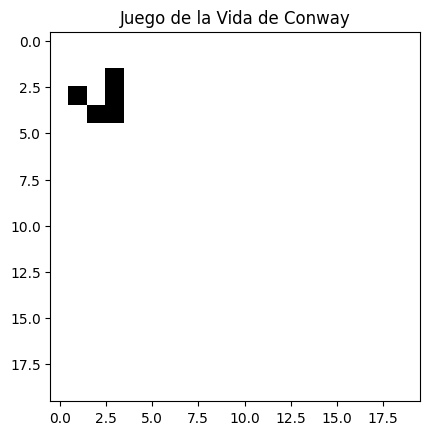

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def crear_tablero(n, m, patron_inicial=None):
    tablero = np.zeros((n, m), dtype=int)
    if patron_inicial is not None:
        for (x, y) in patron_inicial:
            if 0 <= x < n and 0 <= y < m:
                tablero[x, y] = 1
    return tablero

def contar_vecinos_vivos(tablero, x, y):
    n, m = tablero.shape
    suma = 0
    for i in range(x-1, x+2):
        for j in range(y-1, y+2):
            if (i == x and j == y) or i < 0 or j < 0 or i >= n or j >= m:
                continue
            suma += tablero[i, j]
    return suma

def actualizar_tablero(tablero):
    n, m = tablero.shape
    nuevo_tablero = np.zeros((n, m), dtype=int)
    
    for i in range(n):
        for j in range(m):
            vecinos = contar_vecinos_vivos(tablero, i, j)
            if tablero[i, j] == 1:  # Celda viva
                if vecinos < 2 or vecinos > 3:
                    nuevo_tablero[i, j] = 0  # Muere
                else:
                    nuevo_tablero[i, j] = 1  # Sigue viva
            else:  # Celda muerta
                if vecinos == 3:
                    nuevo_tablero[i, j] = 1  # Nace
    return nuevo_tablero

def animar_juego(tablero_inicial, iteraciones, intervalo=300):
    fig, ax = plt.subplots()
    img = ax.imshow(tablero_inicial, cmap='Greys', interpolation='nearest')
    ax.set_title("Juego de la Vida de Conway")

    def update(frame):
        nonlocal tablero_inicial
        tablero_inicial = actualizar_tablero(tablero_inicial)
        img.set_data(tablero_inicial)
        return [img]

    anim = animation.FuncAnimation(fig, update, frames=iteraciones, interval=intervalo, blit=True)
    plt.show()

# --- Uso ---

# Patrón inicial: "Glider"
patron_glider = [
    (1, 2),
    (2, 3),
    (3, 1), (3, 2), (3, 3)
]

n, m = 20, 20
tablero = crear_tablero(n, m, patron_glider)

# Ejecutar animación durante 50 iteraciones
animar_juego(tablero, iteraciones=50)
